# ML Fondamentals - IMLEX & COSI first year Master
# Decision Trees

The Scikit-Learn documentation on Decision Trees can be found here: http://scikit-learn.org/stable/modules/tree.html

In this lab, we are going to use 2 classic datasets, coming from the [UCI](https://archive.ics.uci.edu/ml/index.php) databases.

**Fabiano Junior Maia Manschein - IMLEX**

## Car data
In this dataset, it is a question of the acceptability of cars according to 6 criteria (so our data is in dimension 6, to which is added a seventh corresponding to the class).

The 1726 data are sorted into 4 classes: not acceptable (*unacc*), acceptable (*acc*), good (*good*), very good (*vgood*). For more details, the web page describing the data can be found [here](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation).
### Data recovery and preparation

We first need to retrieve the data - available in the form of a .csv - (a line in a notebook starting with '!' authorizes the use of any shell command):

In [124]:
# ! wget https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data 
    #only for linux (and apple?) users... The others have to see how to download the data and store it in this folder
    # NOTE:WORKED ON WINDOWS 10 in a virtual environment (python local env)

The data is structured this way:
- one data per line
- each line is composed of the respective values for each attribute, separated by commas
- the last value is the class

In [ ]:
# ! cat car.data
#only for linux (and apple?) users... The others have to see how to visualize the data

Avant de commencer, on peut analyser les données en regardant leurs caractéristiques :

<p>Nombre d'attribus: 6</p>
<p>Valeurs d'attribut manquantes : aucune</p>
<table>
<thead>
<tr>
<th>Attribut</th>
<th>Valeurs</th>
</tr>
</thead>
<tbody>
<tr>
<td>buying</td>
<td>v-high, high, med, low</td>
</tr>
<tr>
<td>maint</td>
<td>v-high, high, med, low</td>
</tr>
<tr>
<td>doors</td>
<td>2, 3, 4, 5-more</td>
</tr>
<tr>
<td>persons</td>
<td>2, 4, more</td>
</tr>
<tr>
<td>lug_boot</td>
<td>small, med, big</td>
</tr>
<tr>
<td>safety</td>
<td>low, med, high</td>
</tr>
</tbody>
</table>

<p>Nombre de données : 1728 </p>
<table>
<thead>
<tr>
<th>classe</th>
<th>Nombre</th>
<th>Nombre[%]</th>
</tr>
</thead>
<tbody>
<tr>
<td>unacc</td>
<td>1210</td>
<td>70.023 %</td>
</tr>
<tr>
<td>acc</td>
<td>384</td>
<td>22.222 %</td>
</tr>
<tr>
<td>good</td>
<td>69</td>
<td>3.993 %</td>
</tr>
<tr>
<td>v-good</td>
<td>65</td>
<td>3.762 %</td>
</tr>
</table>
<p>Nous avons donc des données très déséquilibrées au niveau des classes.</p>
<p>Pour pouvoir travailler avec, il nous faut commencer par mettre les données dans un format utile à scikit-learn :</p>

There exists thus a huge difference between classes. To use this dataset, we first need to transform it into a scikit-learn format:

In [126]:
import numpy as np

nom_attributs = ["buying", "maint", "doors", "persons", "lug_boot", "safety"]
# get data in strings format:
donnees = np.genfromtxt(fname = "car.data", delimiter = ',', dtype="U")
X_string = donnees[:, :-1]

# Transformation into float
from sklearn.preprocessing import OrdinalEncoder
codage = OrdinalEncoder()
codage.fit(X_string)
X = codage.transform(X_string)
X = X.astype(int) #transform float into int

**Q.** Do the same with the classes to obtain a vector *y* of integers.

In [127]:
# your turn
classes_string = donnees[:, -1:]

codage = OrdinalEncoder()
codage.fit(classes_string)
y = codage.transform(classes_string)
y = y.astype(int) #transform float into int
classes_string

array([['unacc'],
       ['unacc'],
       ['unacc'],
       ...,
       ['unacc'],
       ['good'],
       ['vgood']], dtype='<U5')

### Learning decision trees
#### Pre-processing
Now that they have a format acceptable to scikit-learn, we will split the data into a test set and a training set. Do you remember the train_test_split function?.

In [128]:
# your turn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42) 

We will use the *sklearn.tree.DecisionTreeClassifier* class which contains everything needed for supervised classification using decision trees. You can find its documentation here: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

To use without moderation !

#### Learning
Let's start by creating an instance of the class:

In [129]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

Now that the classifier has been created, we need to train it on the data, i.e. perform the training:

In [130]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

Let's evaluate the performance on the test sample:

In [131]:
print("Accuracy (rate of correct classification) : %f" %clf.score(X_test, y_test))

# Calcul du F-score
from sklearn.metrics import f1_score
y_predits = clf.predict(X_test)
print("F-score global : %f " %f1_score(y_test, y_predits, average='micro'))
print("F-score global (weighted) : %f " %f1_score(y_test, y_predits, average='macro'))
F_scores = f1_score(y_test, y_predits, average=None)
for i in range(4):
    print("F-score for the class %i : %f" %(i, F_scores[i]))

Accuracy (rate of correct classification) : 0.979167
F-score global : 0.979167 
F-score global (weighted) : 0.931971 
F-score for the class 0 : 0.955224
F-score for the class 1 : 0.800000
F-score for the class 2 : 0.998302
F-score for the class 3 : 0.974359


It's not bad, right?

#### Display
The advantage of decision trees is that they offer a graphical representation. But to be able to display it, we will need to install 2 additional packages:

In [132]:
# !pip3 install pydotplus --user
# !pip3 install graphviz --user

We can then display the learned tree. As we will often need to display a tree, we create a function:

In [133]:
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

def affiche_arbre(classifieur, nom_attributs):
    dot_data = export_graphviz(classifieur,
                            feature_names=nom_attributs,
                            out_file=None,
                            filled=True,
                            rounded=True)
    return pydotplus.graph_from_dot_data(dot_data)

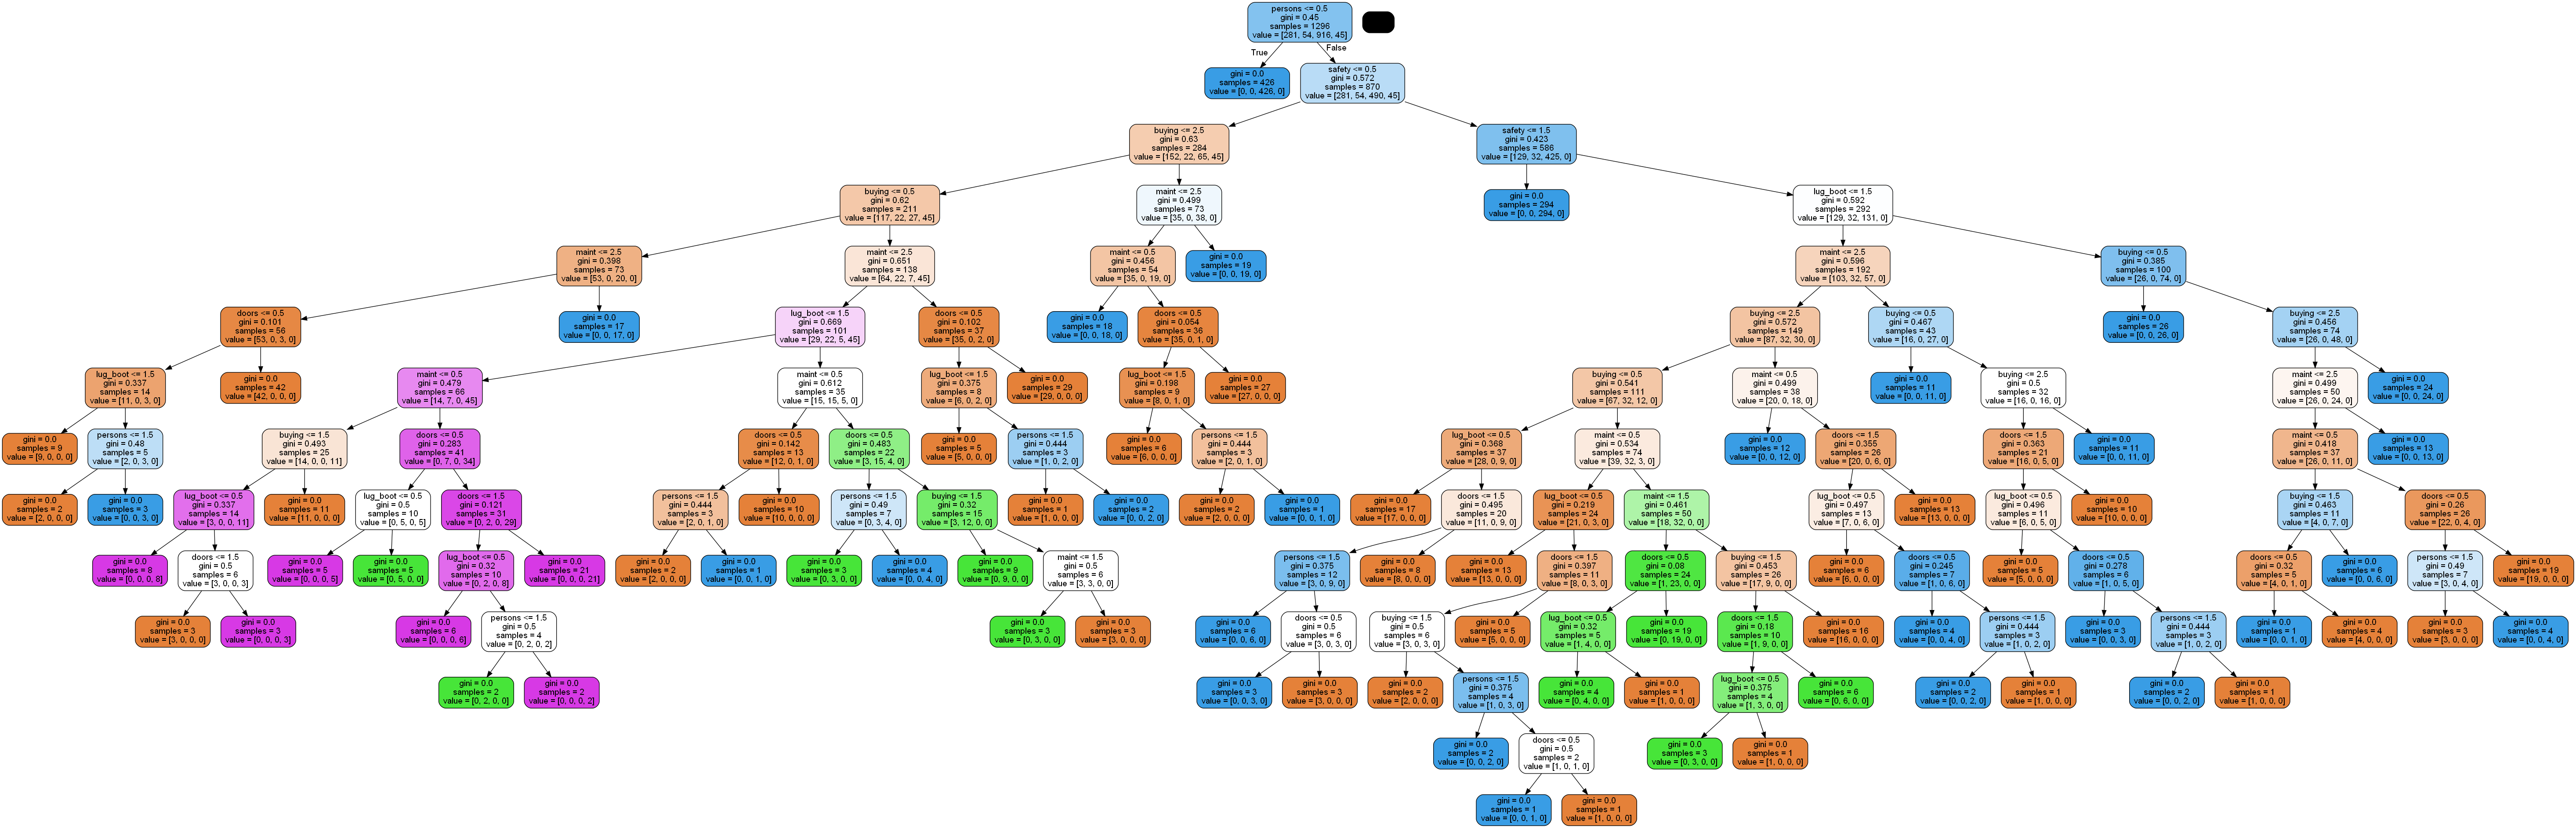

In [134]:
graph = affiche_arbre(clf, nom_attributs) 
Image(graph.create_png())

## Cross Validation

If you were curious, you may have already tried this:

In [135]:
clf

DecisionTreeClassifier(random_state=42)

So there are 13 initialization parameters for the classifier. We propose to study the impact of 3 of them on learning:
- *criterion* which by default is 'gini' but can also be 'entropy'
- *max_depth* which allows to prune the tree by stopping the recursive call of the learning algorithm when the current node is at this depth
- *max_leaf_nodes* which also prunes the tree by keeping only this number of leaves (the purest ones, i.e. with the least data of different classes)

The data on the cars being too simple to appreciate the power of the decision trees, we will use another one: the *digits*, already included into scikit-learn:

In [136]:
from sklearn.datasets import load_digits  #importation de la commande
digits = load_digits()
X = digits.data
y = digits.target

It's time to see if you've followed this far. You need to: set aside 30% for the test, create a classifier based on decision trees, learn it on the training data, calculate the rate of good classification, and the different variants of the F-score on the 10 digit classes using test data.

In [137]:
# Your turn

# Test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42) 

# Decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Learn (fit)
clf.fit(X_train,y_train)

# Metrics
y_predits = clf.predict(X_test)
print("F-score global : %f " %f1_score(y_test, y_predits, average='micro'))
print("F-score global (weighted) : %f " %f1_score(y_test, y_predits, average='macro'))
F_scores = f1_score(y_test, y_predits, average=None)
for i in range(10):
    print("F-score for the class %i : %f" %(i, F_scores[i]))

F-score global : 0.842593 
F-score global (weighted) : 0.840876 
F-score for the class 0 : 0.914286
F-score for the class 1 : 0.757282
F-score for the class 2 : 0.786517
F-score for the class 3 : 0.814159
F-score for the class 4 : 0.829268
F-score for the class 5 : 0.890625
F-score for the class 6 : 0.934579
F-score for the class 7 : 0.844037
F-score for the class 8 : 0.825000
F-score for the class 9 : 0.813008


Now that we have measured the quality for the default values ​​of the hyperparameters, we will perform **cross-validation** on the training set (*train*). Once we have found the best parameters, we will train a tree on the complete training set with these parameters and we will evaluate the quality of this final training on the test set.

We start by evaluating the impact of the test choice criterion (*criteriom*):

In [138]:
from sklearn.model_selection import cross_val_score

clf_gini = DecisionTreeClassifier(random_state=42)
reussite_gini = cross_val_score(clf_gini, X_train, y_train, cv = 10)
f1_gini = cross_val_score(clf_gini, X_train, y_train, cv = 10, scoring='f1_macro')
print("For gini :\n \t Accuracy : %f (+/-) %f\n \
      \t F-score (global) : %f (+/-) %f\n " 
      %(reussite_gini.mean(), reussite_gini.std(), f1_gini.mean(), f1_gini.std()) )

clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
reussite_entropy = cross_val_score(clf_entropy, X_train, y_train, cv = 10)
f1_entropy = cross_val_score(clf_entropy, X_train, y_train, cv = 10, scoring='f1_macro')
print("For the entropy :\n \t Accuracy : %f (+/-) %f\n \
      \t F-score (global) : %f (+/-) %f\n " 
      %(reussite_entropy.mean(), reussite_entropy.std(), f1_entropy.mean(), f1_entropy.std()) )

For gini :
 	 Accuracy : 0.844102 (+/-) 0.024983
       	 F-score (global) : 0.843556 (+/-) 0.023918
 
For the entropy :
 	 Accuracy : 0.852038 (+/-) 0.033138
       	 F-score (global) : 0.850469 (+/-) 0.033004
 


NOTE: `gini` has lower std (varies less), while `entropy` has a higher mean value (varies more with a higher mean value). Since the mean values are very close, I'd opt for the less varying option `gini` with priority for consistency in results.

What to deduce? Is the entropy statistically better on this dataset? Choose a criterion: this will be the only one that will be used later.

We must now look at the impact of the other 2 parameters:
- *max_depth* that we will vary between 5 and 20
- *max_leaf_nodes* that we want to vary between 20 and 200 in steps of 20 (i.e. 20, 40, 60, ..., 200).
We propose to study the impact of these parameters independently, with entropy as a selection criterion.

It will be necessary to produce 4 curves showing the evolutions of the success rate and the overall F-score with each of the parameters. It will also be necessary to show the standard deviation on the curves: the use of the pyplot *errorbar* function (https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.errorbar) is strongly recommended.

In [139]:
# your turn
import numpy as np
import matplotlib.pyplot as plt

# These metrics will be used for plotting with errorbars later
depth_metrics = {
    "acc_mean": [],
    "acc_std": [],
    "f1_mean": [],
    "f1_std": [],
    "max_depth": []
}
leaf_metrics = {
    "acc_mean": [],
    "acc_std": [],
    "f1_mean": [],
    "f1_std": [],
    "max_leaf_nodes": []
}

# Iterate between values of 5 and 20 for depth, training the classifier and calculating acc and f1
for depth in range(5, 21):
    # Create classifier with according depth and do cross validation
    clf_depth = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=depth)
    reussite_depth = cross_val_score(clf_depth, X_train, y_train, cv = 10)
    f1_depth = cross_val_score(clf_depth, X_train, y_train, cv = 10, scoring='f1_macro')

    # Get metrics
    acc_mean = reussite_depth.mean()
    acc_std = reussite_depth.std()
    f1_mean = f1_depth.mean()
    f1_std = f1_depth.std()

    # Add metrics to our data structure
    depth_metrics["acc_mean"].append(acc_mean)
    depth_metrics["acc_std"].append(acc_std)
    depth_metrics["f1_mean"].append(f1_mean)
    depth_metrics["f1_std"].append(f1_std)
    depth_metrics["max_depth"].append(depth)

# Do the same for values of max_leaf_nodes between 20 and 200 in steps of 20
for leaf in range(20, 200, 20):
    # Create classifier with according leaf and do cross validation
    clf_leaf = DecisionTreeClassifier(random_state=42, criterion='entropy', max_leaf_nodes=leaf)
    reussite_leaf = cross_val_score(clf_leaf, X_train, y_train, cv = 10)
    f1_leaf = cross_val_score(clf_leaf, X_train, y_train, cv = 10, scoring='f1_macro')

    # Get metrics
    acc_mean = reussite_leaf.mean()
    acc_std = reussite_leaf.std()
    f1_mean = f1_leaf.mean()
    f1_std = f1_leaf.std()

    # Add metrics to our data structure
    leaf_metrics["acc_mean"].append(acc_mean)
    leaf_metrics["acc_std"].append(acc_std)
    leaf_metrics["f1_mean"].append(f1_mean)
    leaf_metrics["f1_std"].append(f1_std)
    leaf_metrics["max_leaf_nodes"].append(leaf)

Deduce the optimal values ​​of the 3 parameters and use them to learn a decision tree on the entire training set, then evaluate the quality of learning on the test set.

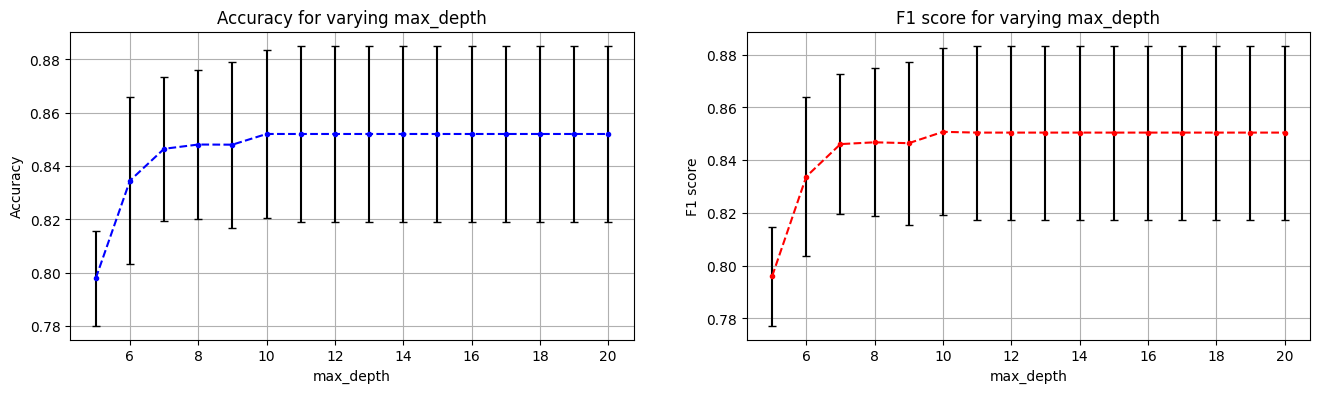

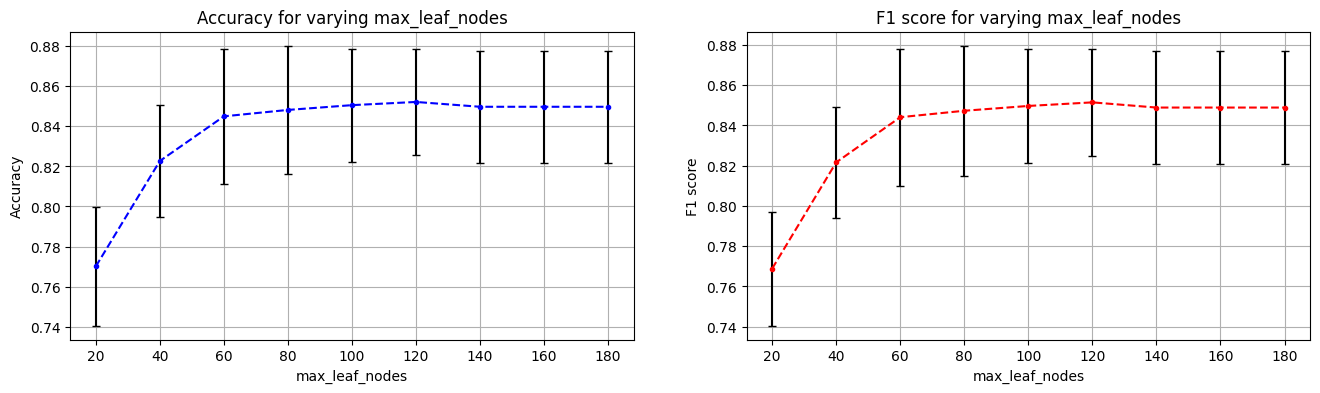

In [140]:
# Your turn

# Here we plot the metrics with errorbars
import numpy as np
import matplotlib.pyplot as plt

# Function for plotting metrics
def plot_metrics(metrics, name):
    x = metrics[name]

    # Accuracy
    y = metrics["acc_mean"]
    yerr = [metrics["acc_std"], metrics["acc_std"]]
    plt.subplot(1, 2, 1)
    plt.title(f"Accuracy for varying {name}")
    plt.grid()
    plt.xlabel(name)
    plt.ylabel("Accuracy")
    plt.errorbar(x, y, yerr=yerr, capsize=3, fmt="b--.", ecolor = "black")

    # F1 score
    y = metrics["f1_mean"]
    yerr = [metrics["f1_std"], metrics["f1_std"]]
    plt.subplot(1, 2, 2)
    plt.title(f"F1 score for varying {name}")
    plt.grid()
    plt.xlabel(name)
    plt.ylabel("F1 score")
    plt.errorbar(x, y, yerr=yerr, capsize=3, fmt="r--.", ecolor = "black")

# Plot for max_depth
plt.figure(figsize=(16, 4))
plot_metrics(
    metrics=depth_metrics, 
    name="max_depth"
)

# Plot for max_leaf_nodes
plt.figure(figsize=(16, 4))
plot_metrics(
    metrics=leaf_metrics,
    name="max_leaf_nodes"
)

## Data Preparation & Random Forests
We continue to increase the difficulty, this time downloading a dataset from Portuguese banks, described [here](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing):

In [141]:
# ! wget https://remieyraud.github.io/bank-additional.csv

### Pandas
Unlike car data, we are going to use a very useful python package to prepare and perform a first data analysis: *pandas*. It is possible that this package is not installed on the machines:

In [142]:
# ! pip3 install pandas --user

You can then import the package, then use the function that allows you to transform a csv file like the one you just downloaded into a *dataframe*. This type, unique to *pandas*, allows data to be presented in a very useful form.

In [143]:
import pandas as pd
df = pd.read_csv('./bank-additional.csv', sep=';')

Now that we have a dataframe, we can easily see what the data looks like, by looking at the first 4:

In [144]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


We can transpose it to read it more simply:

In [145]:
np.transpose(df.head())

,0,1,2,3,4
age,30,39,25,38,47
job,blue-collar,services,services,services,admin.
marital,married,single,married,married,married
education,basic.9y,high.school,high.school,basic.9y,university.degree
default,no,no,no,no,no
housing,yes,no,yes,unknown,yes
loan,no,no,no,unknown,no
contact,cellular,telephone,telephone,telephone,cellular
month,may,may,jun,jun,nov
day_of_week,fri,fri,wed,fri,mon


In [146]:
df.shape

(4119, 21)

There are therefore 4119 data, each being described by 20 attributes, the final column *y* containing the target to learn. This class can take 2 values: *no* or *yes*. For the bank, it was a question of who to offer life insurance to.

What can we say about numerical attributes? Dataframes give us easy access to descriptive statistics:

In [147]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Are these classes fairly represented in the data?

In [148]:
df['y'].value_counts()

no     3668
yes     451
Name: y, dtype: int64

There is therefore a class much more present than the other in the data. It will therefore be necessary to pay attention to how we are going to evaluate the learning in order to take this into account.

You have to put the data in scikit-learn form, but this time it will be easier thanks to *pandas*:

In [149]:
X_raw = df.drop(['y'], axis=1)
y_raw = df['y']
y_raw = np.array(y_raw).reshape(-1, 1)
np.transpose(X_raw.head())

,0,1,2,3,4
age,30,39,25,38,47
job,blue-collar,services,services,services,admin.
marital,married,single,married,married,married
education,basic.9y,high.school,high.school,basic.9y,university.degree
default,no,no,no,no,no
housing,yes,no,yes,unknown,yes
loan,no,no,no,unknown,no
contact,cellular,telephone,telephone,telephone,cellular
month,may,may,jun,jun,nov
day_of_week,fri,fri,wed,fri,mon


### Random forest
Now that the data is prepared for scikit-learn, it's your turn! But we are going to use random forests instead of decision trees.

Scikit-learn also incorporates [random forests](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). Repeat the previous exercise with this classifier, looking at the hyper-parameter *n_estimators*

You must therefore :

1. Transform data to handle attributes that are not numeric,
2. Cut them out (take 30% for the test set),
3. Find the best possible values ​​for the parameter *n_estimator* (test ten of them, evenly distributed between 50 and 600, using cross-validation),
4. Learn on the training set with this optimal value,
5. Calculate the quality measures (error rate and F-score) on the test set

In [150]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=10)

# Your turn

# Preprocessing
codage = OrdinalEncoder()
codage.fit(X_raw)
X = codage.transform(X_raw)
X = X.astype(int) #transform float into int

codage = OrdinalEncoder()
codage.fit(y_raw)
y = codage.transform(y_raw)
y = y.astype(int) #transform float into int

# Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

# Learn (fit)
rf_clf.fit(X_train,y_train)


C:\Users\fabia\AppData\Local\Temp\ipykernel_10968\2990302610.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train,y_train)


RandomForestClassifier(n_estimators=10)

In [ ]:
# Now for the n_estimator metrics
est_metrics = {
    "acc_mean": [],
    "acc_std": [],
    "f1_mean": [],
    "f1_std": [],
    "n_estimators": []
}

# Iterate between values of 50 and 600 with a step of 55, training the classifier and calculating acc and f1
for est in range(50, 601, 55):
    # Create classifier with according n_estimator and do cross validation
    rf_clf_est = RandomForestClassifier(n_estimators=est)
    reussite_est = cross_val_score(rf_clf_est, X_train, y_train, cv = 10)
    f1_est = cross_val_score(rf_clf_est, X_train, y_train, cv = 10, scoring='f1_macro')

    # Get metrics
    acc_mean = reussite_est.mean()
    acc_std = reussite_est.std()
    f1_mean = f1_est.mean()
    f1_std = f1_est.std()

    # Add metrics to our data structure
    est_metrics["acc_mean"].append(acc_mean)
    est_metrics["acc_std"].append(acc_std)
    est_metrics["f1_mean"].append(f1_mean)
    est_metrics["f1_std"].append(f1_std)
    est_metrics["n_estimators"].append(est)

    Max accuracy mean: 0.9146710399846214 at 380 
    Min accuracy std : 0.014705419086242363 at 50 
    Max f1 score mean: 0.7577341932177835 at 380 
    Min f1 std : 0.044201051008073464 at 50 
        


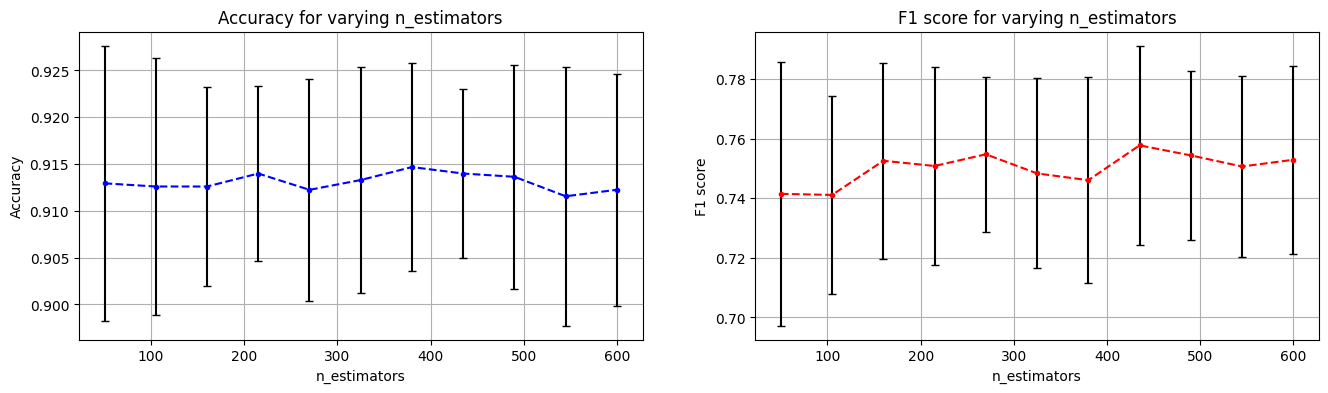

In [152]:
# Plot for max_depth
plt.figure(figsize=(16, 4))
plot_metrics(
    metrics=est_metrics, 
    name="n_estimators"
)

max_acc = max(est_metrics['acc_mean'])
max_acc_index = est_metrics['acc_mean'].index(max_acc)
min_acc_std = max(est_metrics['acc_std'])
min_acc_std_index = est_metrics['acc_std'].index(min_acc_std)

max_f1 = max(est_metrics['f1_mean'])
max_f1_index = est_metrics['f1_mean'].index(max_f1)
min_f1_std = max(est_metrics['f1_std'])
min_f1_std_index = est_metrics['f1_std'].index(min_f1_std)


print(f"\
    Max accuracy mean: {max_acc} at {est_metrics['n_estimators'][max_acc_index]} \n\
    Min accuracy std : {min_acc_std} at {est_metrics['n_estimators'][min_acc_std_index]} \n\
    Max f1 score mean: {max_f1} at {est_metrics['n_estimators'][max_acc_index]} \n\
    Min f1 std : {min_f1_std} at {est_metrics['n_estimators'][min_f1_std_index]} \n\
        ")

**NOTE:** as both `accuracy` and `f1 score` have the highest mean value with `n_estimators=380`, that value will be used for the optimal classifier.

In [160]:
# Learn with the optimal value
n_estimators_optimal = 380
rf_clf_optimal = RandomForestClassifier(n_estimators=n_estimators_optimal)
rf_clf_optimal.fit(X_train,y_train)

C:\Users\fabia\AppData\Local\Temp\ipykernel_10968\39559814.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf_optimal.fit(X_train,y_train)


RandomForestClassifier(n_estimators=380)

In [ ]:
# Get metrics
reussite_est = cross_val_score(rf_clf_optimal, X_train, y_train, cv = 10)
f1_est = cross_val_score(rf_clf_optimal, X_train, y_train, cv = 10, scoring='f1_macro')

# Get metrics
acc_mean = reussite_est.mean()
acc_std = reussite_est.std()
f1_mean = f1_est.mean()
f1_std = f1_est.std()

In [162]:
# Print metrics
print(f"\
        Acuracy   : {acc_mean} (+/-) {acc_std} \n\
        F1 score  : {f1_mean} (+/-) {f1_std} \n\
        Error rate: {1-acc_mean} (+/-) {acc_std} \
    ")

        Acuracy   : 0.9136329777008843 (+/-) 0.013201087949520185 
        F1 score  : 0.7567320805279721 (+/-) 0.026587155681183965 
        Error rate: 0.08636702229911575 (+/-) 0.013201087949520185     


**NOTE:** Results indicate:

- accuracy: `0.9136 (+/-) 0.01320`
- f1 score: `0.7567 (+/-) 0.02659`
- error rate: `0.086367 (+/-) 0.01320`

Error rate in percentage is `8.6367% (+-) 1.32%`

#### Feature Importances
Once you have found the best hyperparameters and train your classifier with them, you can access the attribute *feature_importances_* of the classifier: it will give you for each feature its impact on the classification of the Random Forest. This score is based on the number of decision trees that actually use this feature, weighted by its place in the trees (the closet to the root, the better importance).

1. Which feature is the most used?
2. Draw a plot with the features as horizontal coordinates and the corresponding importance as vertical one 

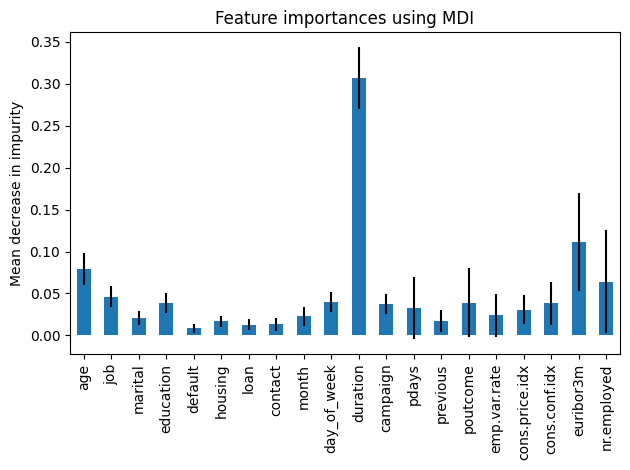

In [163]:
# Get feature importances and std
importances = rf_clf_optimal.feature_importances_
importances_std = np.std([tree.feature_importances_ for tree in rf_clf_optimal.estimators_], axis=0)

# Feature names
feature_names = X_raw.columns

# Plot
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=importances_std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

**NOTE:** from the plot, we can see that `duration` is the most important feature, followed by `euribor3m`, `age`, and `nr.employed`. The least important features seen to be `default`, `loan`, and `contact`.

As written in [scikit-learn documentation](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html):

**Warning** Impurity-based feature importances can be misleading for high cardinality features (many unique values).

In [164]:
from sklearn.inspection import permutation_importance

# Let's check with the feature permutation method
result = permutation_importance(
    rf_clf_optimal, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances_perm = pd.Series(result.importances_mean, index=feature_names)

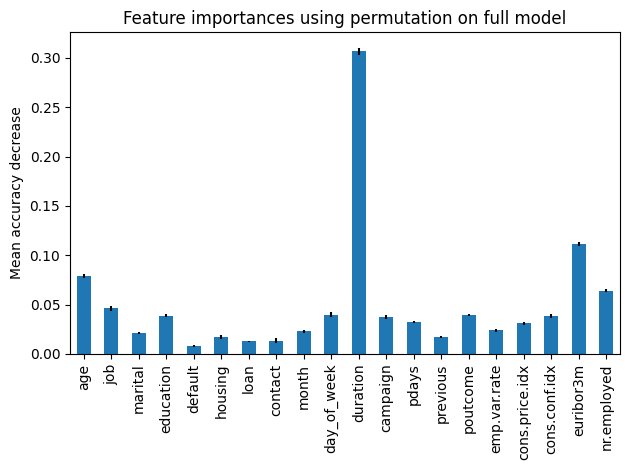

In [165]:
# Plot
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

**NOTE:** We get the same result as before: most important feature is `duration`, followed by `euribor3m`, `age`, and `nr.employed`.